# Info 2950 Project Phase IV
## Google Political Advertising

## Data Analysis 3

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
raw_data = pd.read_csv('google-political-ads-creative-stats.csv')
raw_data.head()

/Users/laurelprime/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Ad_Campaigns_List,Date_Range_Start,Date_Range_End,Num_of_Days,...,Spend_Range_Min_GBP,Spend_Range_Max_GBP,Spend_Range_Min_ILS,Spend_Range_Max_ILS,Spend_Range_Min_NZD,Spend_Range_Max_NZD,Spend_Range_Min_TWD,Spend_Range_Max_TWD,Spend_Range_Min_AUD,Spend_Range_Max_AUD
0,CR104193501419274240,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-25,31,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
1,CR109957691127889920,https://transparencyreport.google.com/politica...,Video,"EU, IT",AR100125170957549568,Azione,NaN,2020-12-02,2020-12-03,2,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
2,CR111129083328331776,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-06-28,2020-09-03,35,...,500,25000.0,2500,125000.0,1500,75000.0,30000,1500000.0,1500,50000.0
3,CR112145169511350272,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2020-10-26,2020-11-02,8,...,0,50.0,0,250.0,0,200.0,0,3000.0,0,150.0
4,CR112255773509156864,https://transparencyreport.google.com/politica...,Image,"EU, IT",AR100125170957549568,Azione,NaN,2021-01-28,2021-02-04,8,...,50,500.0,250,2500.0,200,1500.0,3000,30000.0,150,1500.0


In [4]:
clean_data = pd.read_csv('export_dataframe.csv')
clean_data.head()

,Ad_Type,Regions,Advertiser_Name,Date_Range_Start,Date_Range_End,Num_of_Days,Impressions,Spend_USD,Age_Targeting,Gender_Targeting,Geo_Targeting_Included,Geo_Targeting_Excluded,Spend_Range_Min_USD,Spend_Range_Max_USD
0,Text,US,ALEX FOR AZ,2020-07-08,2020-08-04,28,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
1,Text,US,ALEX FOR AZ,2020-07-07,2020-08-04,29,≤ 10k,1k-50k,Not targeted,Not targeted,"85054, 85207, 85215, 85250, 85251, 85253, 8525...",Not targeted,1000,50000.0
2,Text,US,CITIZENS FOR JD WOOTEN,2020-08-28,2020-11-03,64,10k-100k,1k-50k,Not targeted,Not targeted,"27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
3,Video,US,CITIZENS FOR JD WOOTEN,2020-10-28,2020-11-03,7,100k-1M,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0
4,Video,US,CITIZENS FOR JD WOOTEN,2020-10-26,2020-11-03,9,10k-100k,1k-50k,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender","27215, 27217, 27233, 27244, 27249, 27253, 2725...",Not targeted,1000,50000.0


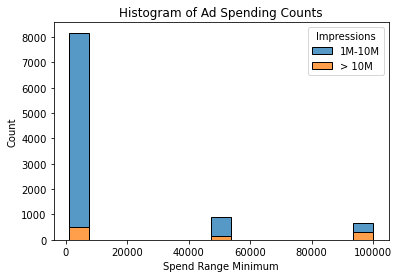

In [5]:
clean_data1 = clean_data.loc[(clean_data['Impressions']=='1M-10M') | (clean_data['Impressions']=='> 10M')]
sns.histplot(x = 'Spend_Range_Min_USD', hue = 'Impressions', data = clean_data1, multiple = 'stack')
plt.xlabel('Spend Range Minimum');
plt.title('Histogram of Ad Spending Counts');

In [6]:
#summary stats
clean_data[['Impressions', 'Spend_USD']].describe()

,Impressions,Spend_USD
count,81228,81228
unique,5,3
top,100k-1M,1k-50k
freq,42633,79110


In [7]:
clean_data[['Impressions', 'Spend_USD']].mode()

,Impressions,Spend_USD
0,100k-1M,1k-50k
